In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import sys; sys.path.append('../src/')
import one_dim_search.dichotomy as dichot
import one_dim_search.fib as fib
import one_dim_search.linear as lin
import one_dim_search.golden as gold
from descent.grad import gradient_descent_iter, get_constant_step_chooser

from IPython.display import Image

In [2]:
def rosenbrock_f(arg):
    x = arg[0]
    y = arg[1]
    return 100 * ((y - x ** 2) ** 2) + ((1. - x) ** 2)

def rosenbrock_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (200 * (x ** 3) - 200 * x * y + x - 1)
    dy = 200 * (y - (x ** 2))
    return np.array([dx, dy])

In [4]:
def analyze(*, f, f_grad, x_border, y_border, chooser, desc_eps=1e-5,
           _v=100000):
    x = np.linspace(x_border[0], x_border[1], 50)
    y = np.linspace(y_border[0], y_border[1], 50)
    z = np.vectorize(lambda x, y: f(np.array([x, y])) ** (1/3))(*np.meshgrid(x, y))

    fig = go.Figure()
    fig.add_trace(
        go.Contour(
            x=x, y=y,
            z=z,
            contours_coloring='lines',
            line_width=2
        ))
    
    it = gradient_descent_iter(
        f=f, f_grad=f_grad, eps=desc_eps,
        start=np.array([-10, 20]),
        step_chooser=chooser,
        _verbose=_v
    )
    
    xy = list(it)
    print(f'step count = {len(xy)}')
    fig.add_trace(
        go.Scatter(
            x=[p[0] for p in xy], 
            y=[p[1] for p in xy],
        )
    )
    
    fig.show()

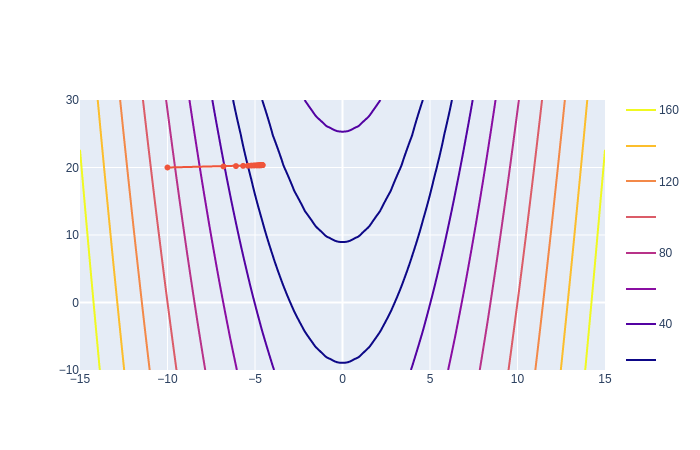

In [10]:
# analyze(
#     f=rosenbrock_f,
#     f_grad=rosenbrock_grad,
#     x_border=(-15, 15),
#     y_border=(-10, 30),
#     chooser=get_constant_step_chooser(1e-5)
# )
Image('pics/grad_sample1.png')

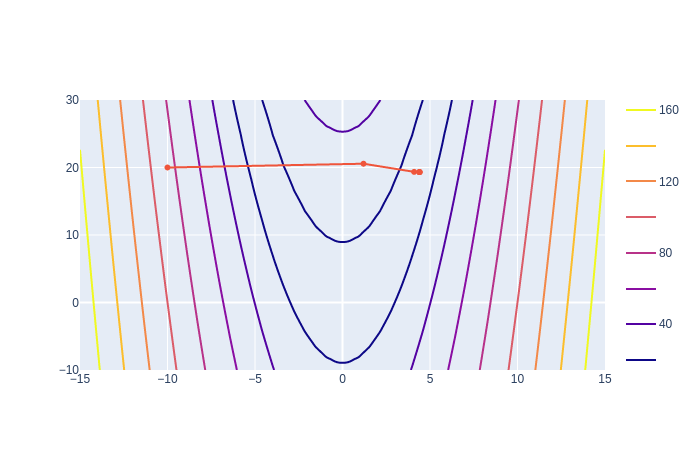

In [12]:
def generic_step_chooser(one_dim_search):
    def step_chooser(f, x_k, cur_grad):
        print(f'finding step from {x_k} with grad {cur_grad}')
        phi = lambda h: f(x_k - h * cur_grad)
        l, r = lin.search(0, delta=1e-5, f=phi, eps=1e-5, multiplier=2)
        print(f'try find in ({l}, {r})')
        l, r = one_dim_search(l, r, f=phi, eps=1e-2)
        return (l + r) / 2
    return step_chooser

# analyze(
#     f=rosenbrock_f,
#     f_grad=rosenbrock_grad,
#     x_border=(-15, 15),
#     y_border=(-10, 30),
#     chooser=generic_step_chooser(gold.search),
#     desc_eps=1e-10,
#     _v = 100000
# )
Image('pics/grad_sample2.png')

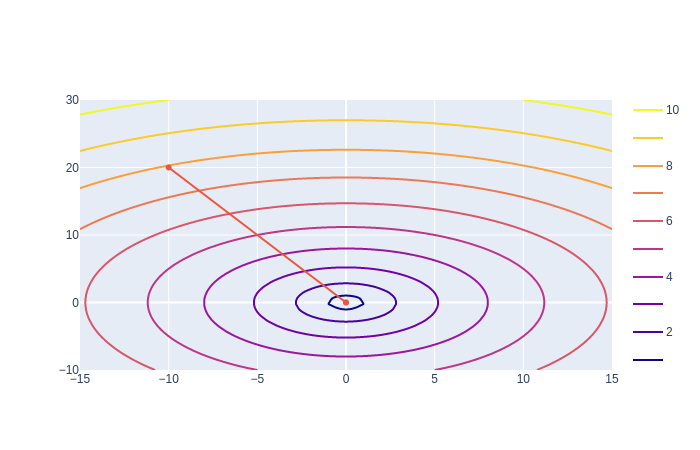

In [14]:
def sum_squares_f(args):
    return np.sum(args ** 2)

def sum_squares_grad(args):
    return 2 * args

def generic_step_chooser(one_dim_search):
    def step_chooser(f, x_k, cur_grad):
        print(f'finding step from {x_k} with grad {cur_grad}')
        phi = lambda h: f(x_k - h * cur_grad)
        l, r = lin.search(0, delta=1e-5, f=phi, eps=1e-5, multiplier=2)
        print(f'try find in ({l}, {r})')
        l, r = one_dim_search(l, r, f=phi, eps=1e-2)
        return (l + r) / 2
    return step_chooser

# analyze(
#     f=sum_squares_f,
#     f_grad=sum_squares_grad,
#     x_border=(-15, 15),
#     y_border=(-10, 30),
#     chooser=generic_step_chooser(gold.search),
#     desc_eps=1e-10,
#     _v = 100000
# )

Image('pics/grad_sample3.png')

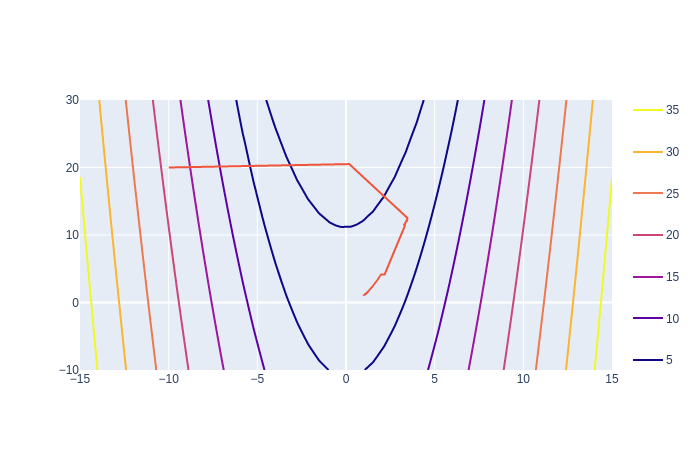

In [15]:
def simple_rosenbrock_f(arg):
    x = arg[0]
    y = arg[1]
    return ((y - x ** 2) ** 2) + ((1. - x) ** 2)

def simple_rosenbrock_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (2 * (x ** 3) - 2 * x * y + x - 1)
    dy = 2 * (y - (x ** 2))
    return np.array([dx, dy])


def generic_step_chooser(one_dim_search):
    def step_chooser(f, x_k, cur_grad):
#         print(f'finding step from {x_k} with grad {cur_grad}')
        phi = lambda h: f(x_k - h * cur_grad)
        l, r = lin.search(0, delta=1e-5, f=phi, eps=1e-5, multiplier=2)
#         print(f'try find in ({l}, {r})')
        l, r = one_dim_search(l, r, f=phi, eps=1e-2)
        return (l + r) / 2
    return step_chooser

# analyze(
#     f=simple_rosenbrock_f,
#     f_grad=simple_rosenbrock_grad,
#     x_border=(-15, 15),
#     y_border=(-10, 30),
#     chooser=generic_step_chooser(gold.search),
#     desc_eps=1e-10,
#     _v = 100000
# )

Image('pics/grad_sample4.png')